In [45]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [46]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [47]:
# load model
model = tf.keras.models.load_model('./models/object_detection.h5')
print('model loaded sucessfully')

model loaded sucessfully


In [48]:
path = './test_images/N56.jpeg'
image = load_img(path) 
image = np.array(image,dtype=np.uint8) 
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0

In [49]:
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 417
Width of the image = 769


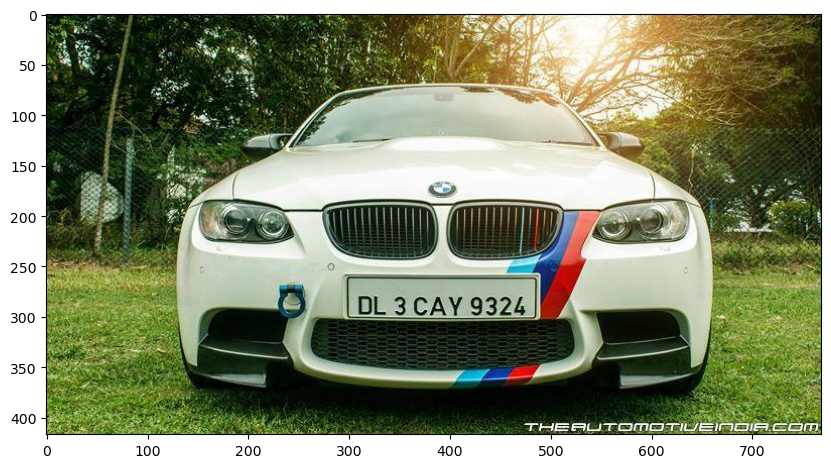

In [50]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [51]:
image_arr_224.shape

(224, 224, 3)

In [52]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [53]:
coords = model.predict(test_arr)
coords

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.3999557 , 0.62742436, 0.6320736 , 0.71377814]], dtype=float32)

In [54]:
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[307.56592554, 482.48933232, 263.57468337, 297.64548361]])

In [55]:
coords = coords.astype(np.int32)
coords

array([[307, 482, 263, 297]])

(307, 263) (482, 297)


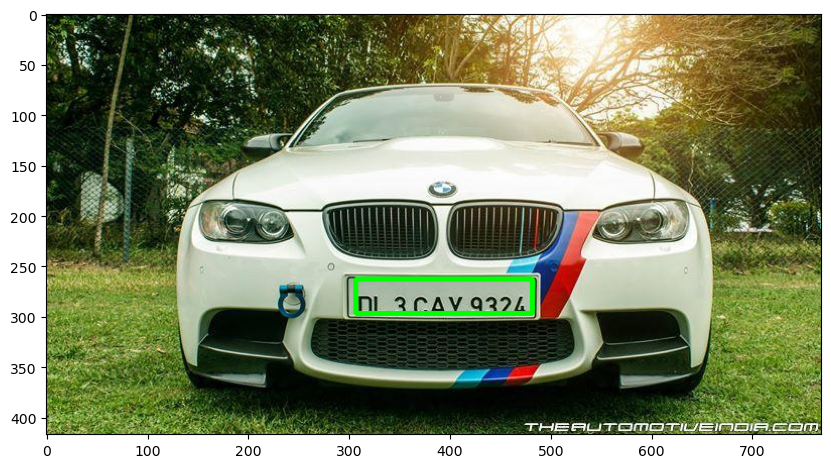

In [56]:
xmin, xmax,ymin,ymax = coords[0]
pt1 =(xmin,ymin)
pt2 =(xmax,ymax)
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [57]:
path = './test_images/N207.jpeg'
def object_detection(path):
    # read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    # data preprocessing
    image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    # make predictions
    coords = model.predict(test_arr)
    # denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    # draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
(307, 263) (482, 297)


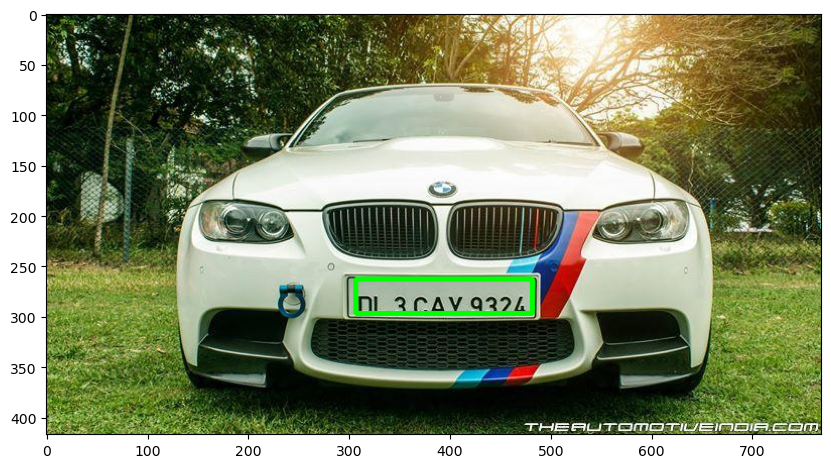

In [58]:
path = './test_images/N56.jpeg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [59]:
import pytesseract as pt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
(162, 162) (338, 196)


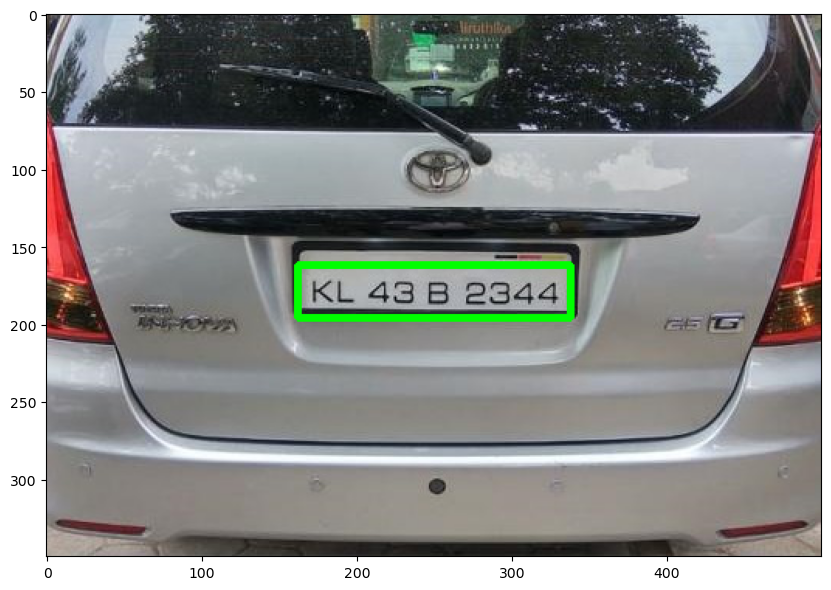

In [75]:
path = './test_images/N67.jpeg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [76]:
img = np.array(load_img(path))
xmin ,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

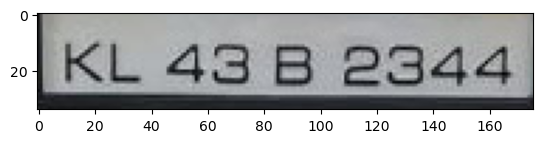

In [77]:
plt.imshow(roi)
plt.show()

In [78]:
pt.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'


In [79]:
text = pt.image_to_string(roi)
print(text)

KL 43 B 2344


